In [93]:
import pandas as pd
import numpy as np
import missingno as msno

In [94]:
df = pd.read_csv('sdn_dataset.csv')

In [95]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [96]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

Distribution of Missing Values in the Dataset

<AxesSubplot: >

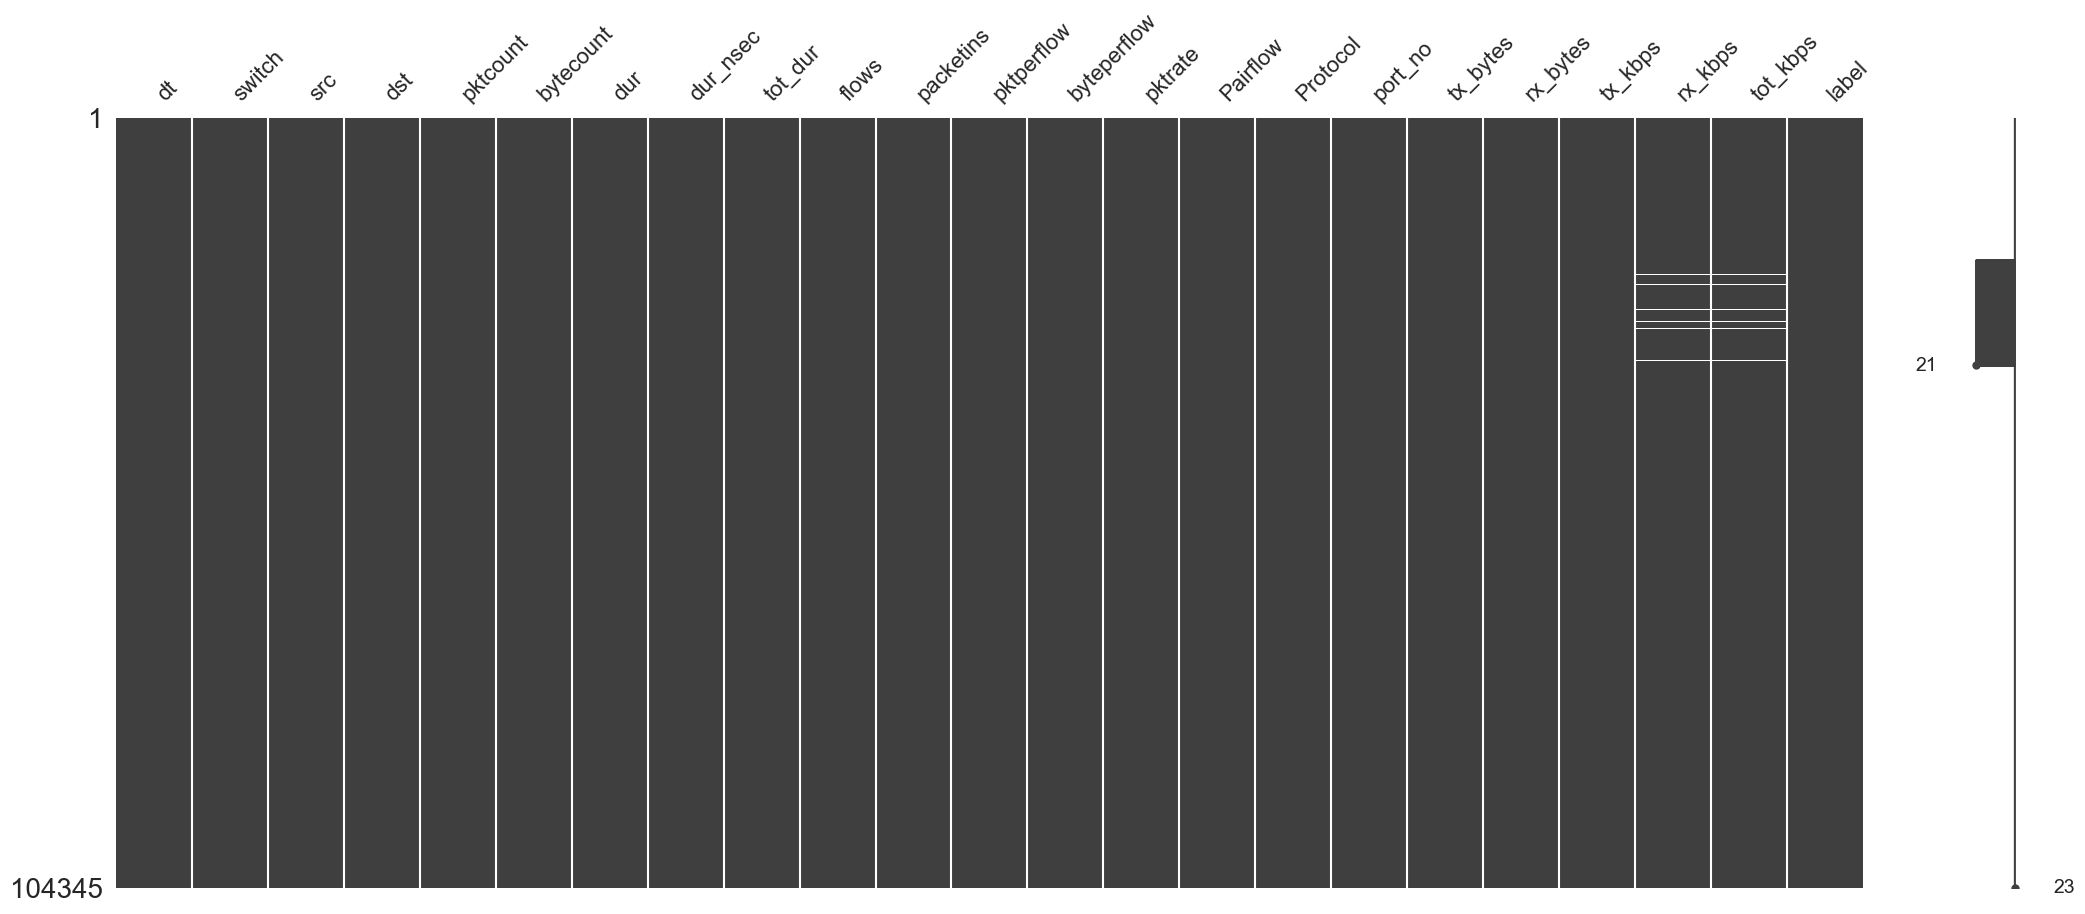

In [98]:
msno.matrix(df)

Count of Null Values in Each Column

In [99]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

Drop rows with Null values

In [100]:
df.dropna(inplace = True)

DataFrame after dropping Null Values

In [101]:
print(df.isnull().sum())
print("Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
Dataframe has 103839 rows and 23 columns after removing null values


# Features in the Dataset
Categorical Features 

In [102]:
categorical_features = [
    feature for feature in df.columns 
        if df[feature].dtypes == 'O'
]

print("The number of categorical features are ",len(categorical_features))
print("They are : \n",categorical_features)

The number of categorical features are  3
They are : 
 ['src', 'dst', 'Protocol']


Numerical Features

In [103]:
numerical_features = [
    feature for feature in df.columns 
        if df[feature].dtypes != 'O'
]

print("The number of numerical features are ",len(numerical_features))
print("They are : \n",numerical_features)

The number of numerical features are  20
They are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


Number of Unique values in Numerical Features 

In [104]:
df[numerical_features].nunique(axis = 0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

Discrete Numerical Features

In [105]:
discrete_numerical_feature = [
    feature for feature in numerical_features 
        if df[feature].nunique() <= 15 and feature != 'label'

]

print("The number of discrete features are ", len(discrete_numerical_feature))
print("They are : \n", discrete_numerical_feature)

The number of discrete features are  4
They are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


Continuous Features 

In [106]:
continuous_features = [
    feature for feature in numerical_features 
        if feature not in discrete_numerical_feature + ['label']
]

print("The number of Continuous_feature are ", len(continuous_features))
print("They are : \n", continuous_features)

The number of Continuous_feature are  15
They are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


# Exploratory Data Analysis

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

Plotting Functions

In [108]:
def countplot_distribution(col):
    sns.set_theme(style = "darkgrid")
    sns.countplot(y = col, data = df, palette = "Set2", hue = col, legend = False).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style = "darkgrid")
    sns.histplot(data = df, x = col, kde = True, color = "red").set(title = 'Distribution of ' + col)

Distribution of Categorical Features

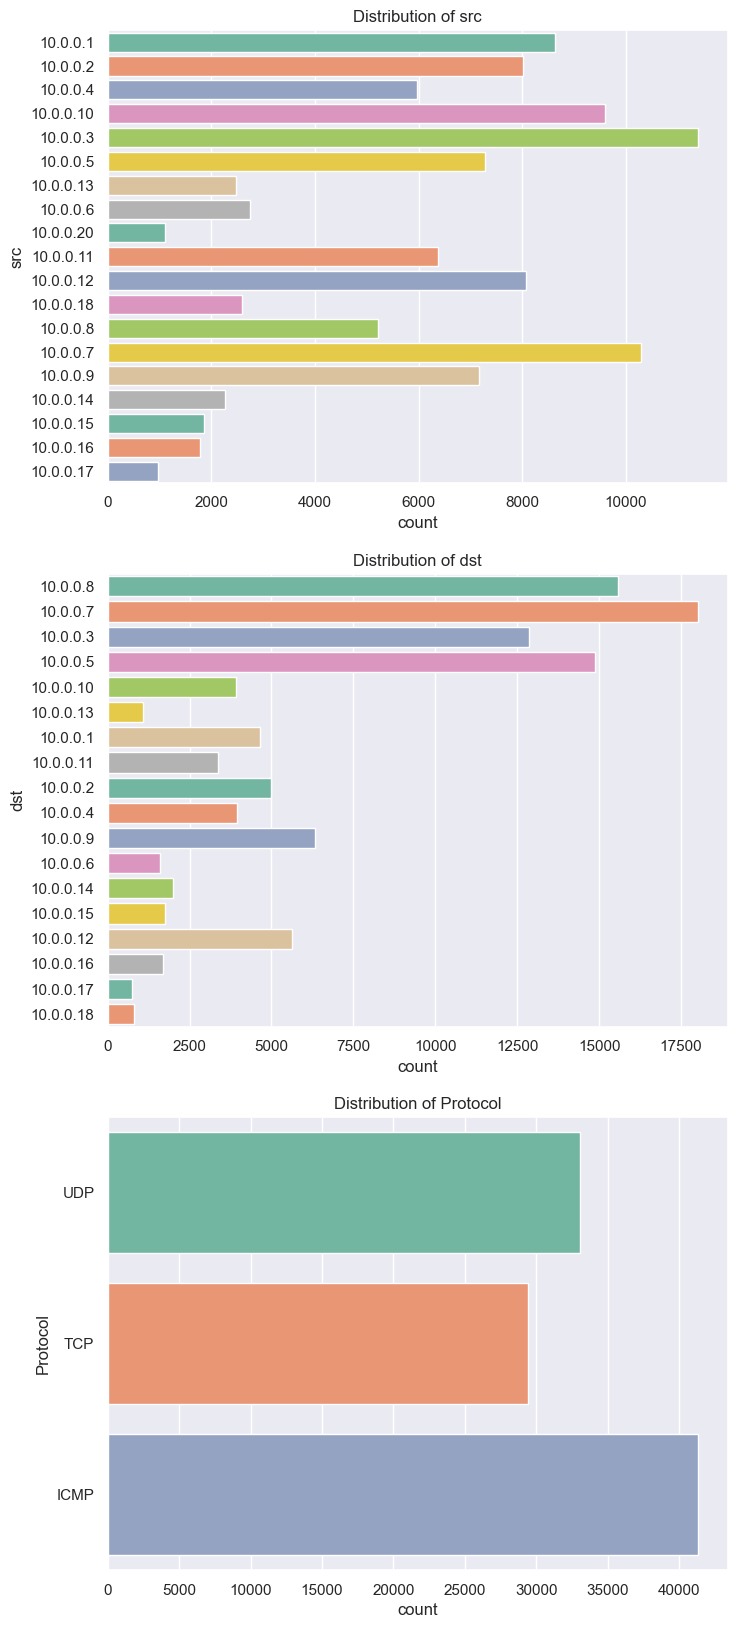

In [109]:
f = plt.figure(figsize = (8, 20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

Distribution of Discrete Features

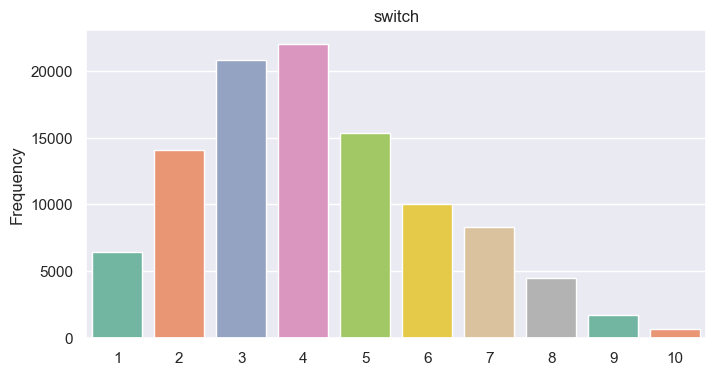

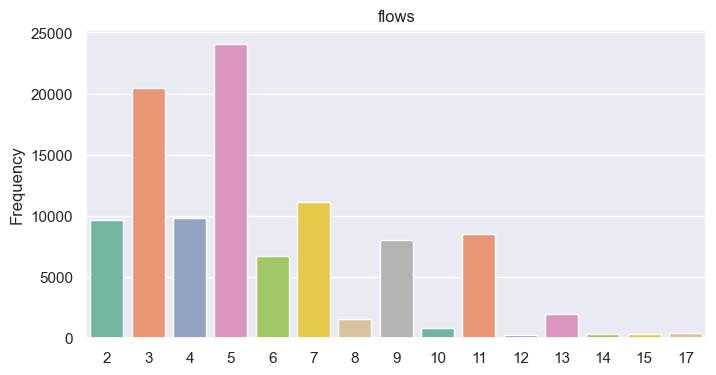

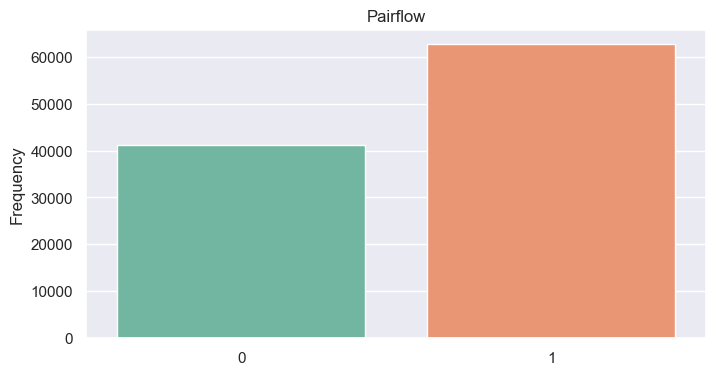

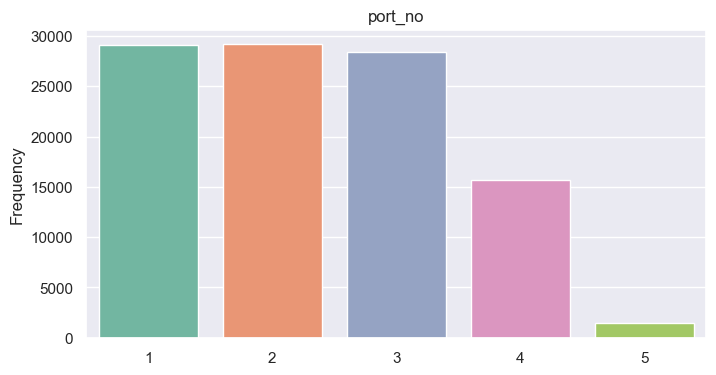

In [110]:
for feature in discrete_numerical_feature:
    plt.figure(figsize = (8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x = cat_num.index, y = cat_num, palette="Set2", legend=False, hue=cat_num.index).set(title = feature, ylabel="Frequency", xlabel="")
    plt.show()

Distribution of Continuous Features

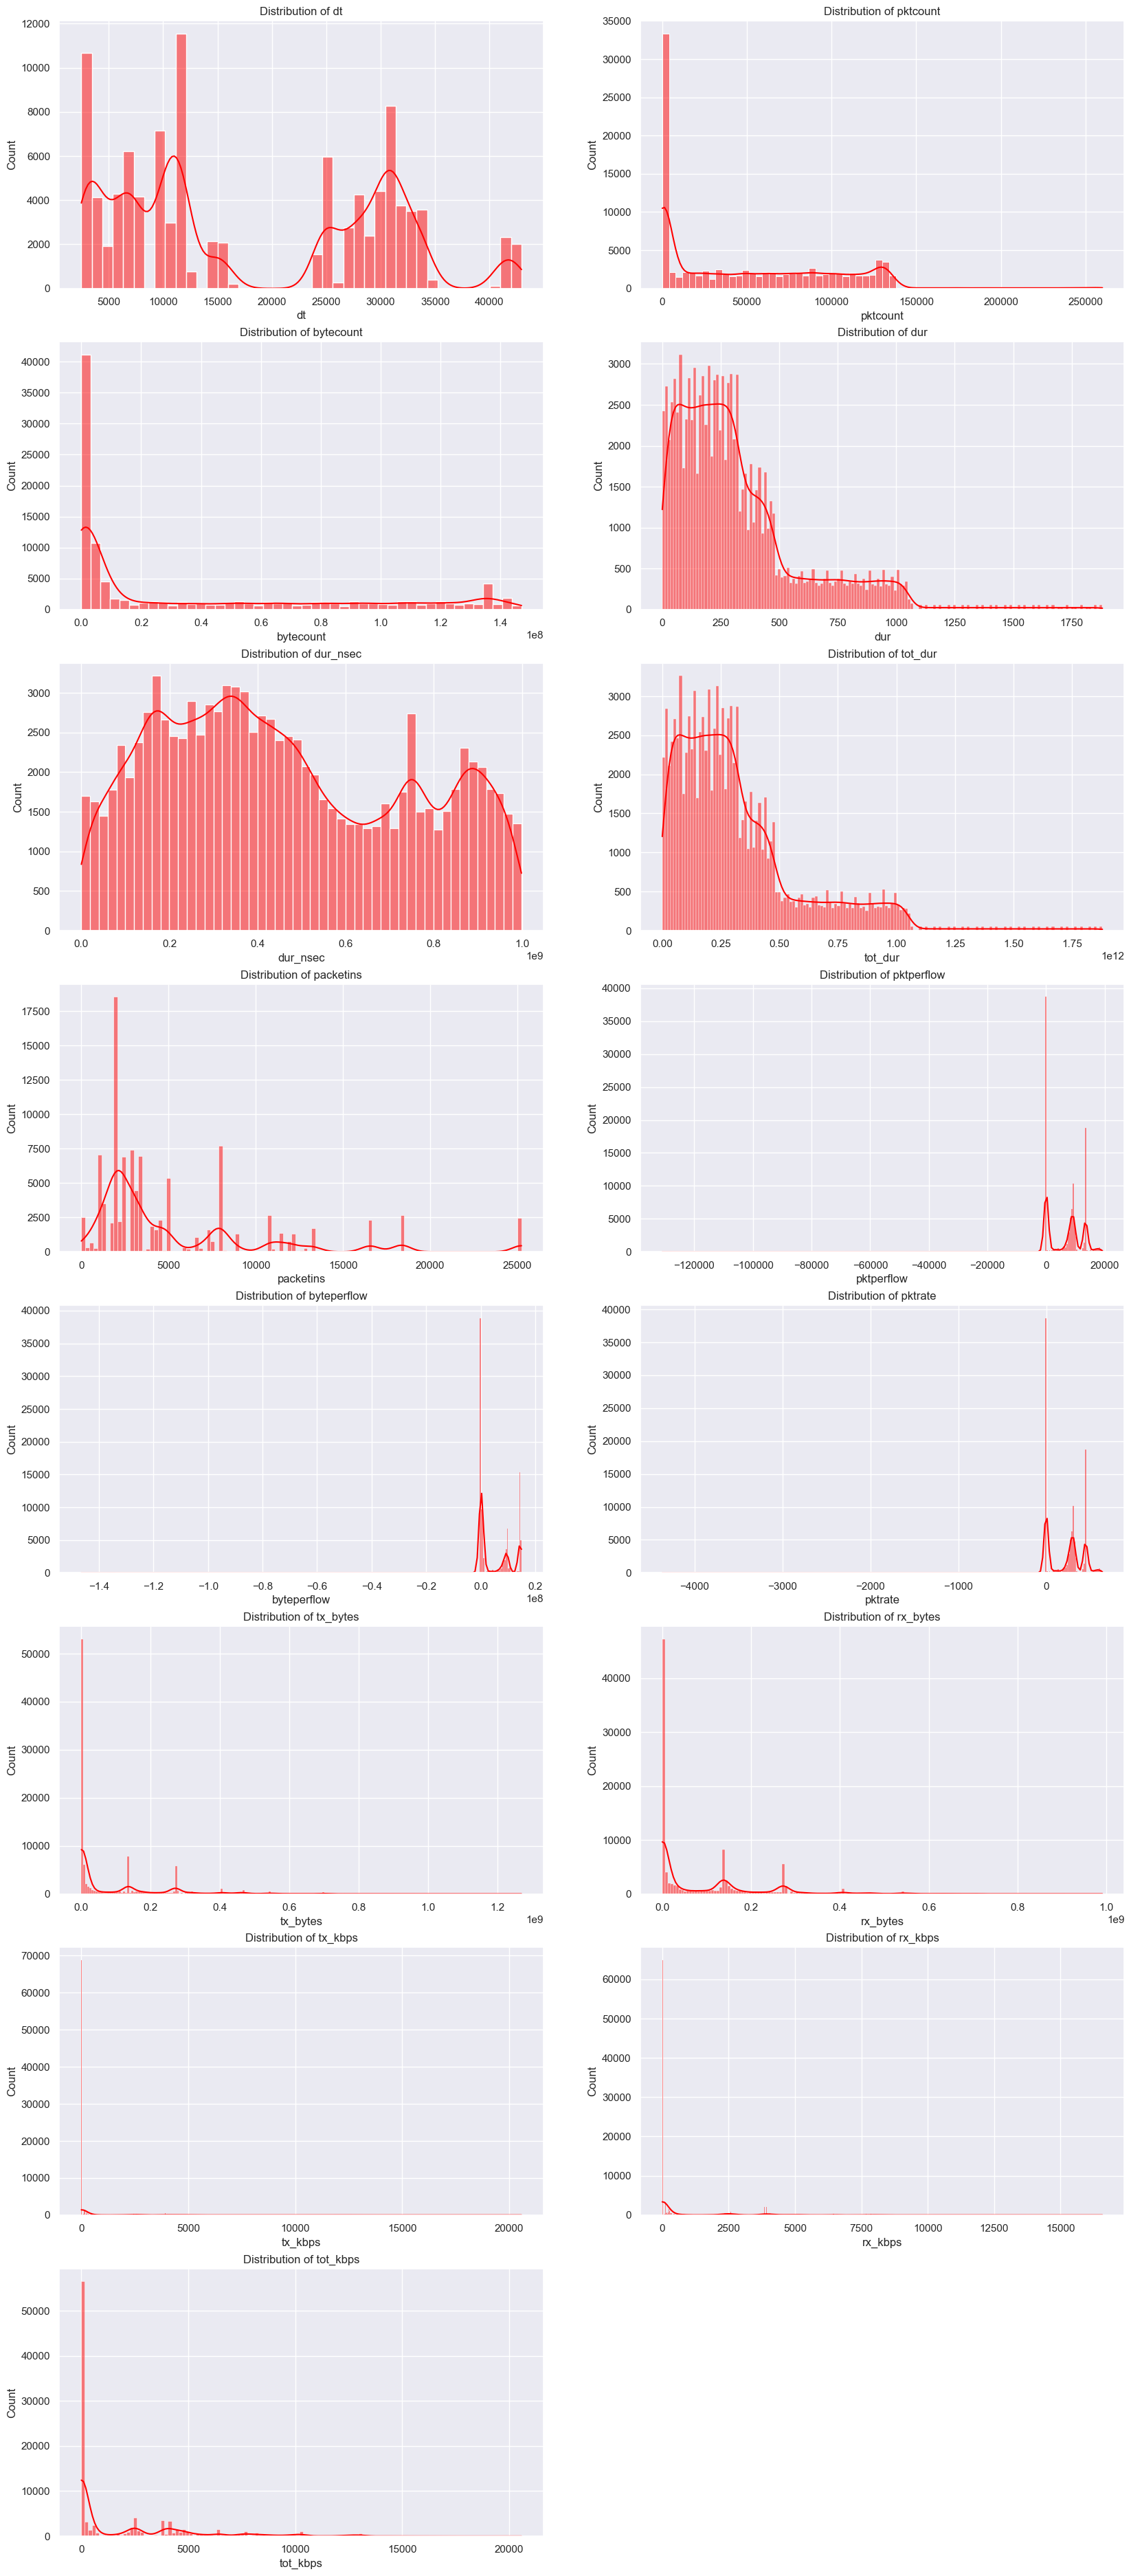

In [111]:
f = plt.figure(figsize = (20, 90))
for i in range(len(continuous_features)):
    f.add_subplot(len(continuous_features), 2, i+1)
    histplot_distribution(continuous_features[i])
plt.show()

Frequency distribution of Label feature 

In [112]:
benign = df[df['label'] == 0]
malign = df[df['label'] == 1]

print('Number of DDOS attacks that has not occured :', round((len(benign)/df.shape[0])*100, 2),'%')
print('Number of DDOS attacks that has occured :', round((len(malign)/df.shape[0])*100, 2), '%')

Number of DDOS attacks that has not occured : 60.99 %
Number of DDOS attacks that has occured : 39.01 %


Visualization of distribution of Label feature

Text(0, 0.5, 'Frequency in %')

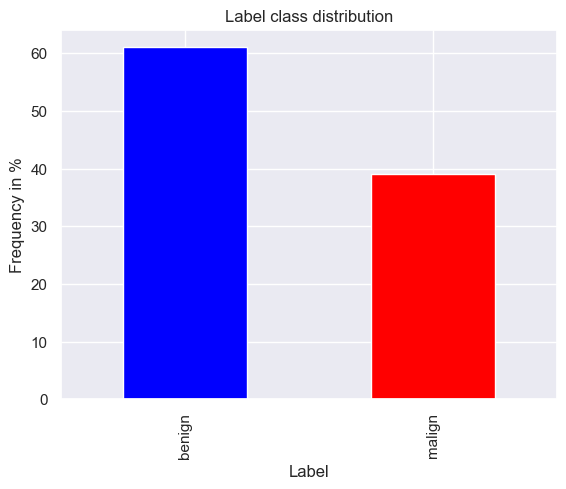

In [113]:
labels = ['benign', 'malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() * 100
classes.plot(kind = 'bar', color = ['blue', 'red'])
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency in %")

In [114]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP', 'TCP', 'ICMP']:
        perc_arr.append(arr.count(i)/len(arr) * 100)
    return perc_arr

Protocol distribution for Malign Label class

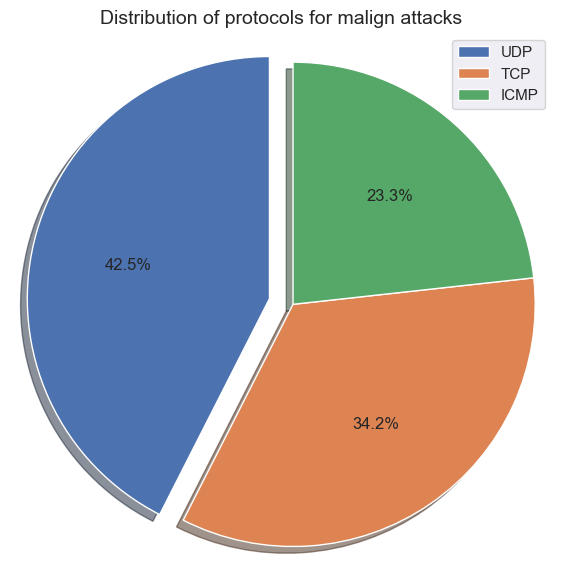

In [115]:
fig_pie, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'], loc = "best")
plt.title('Distribution of protocols for malign attacks', fontsize = 14)
plt.show()

Corelation Matrix for Numerical Features

C:\Users\Pratham\AppData\Local\Temp\ipykernel_18080\1912157160.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
C:\Users\Pratham\AppData\Local\Temp\ipykernel_18080\1912157160.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_matrix, dtype=np.bool)


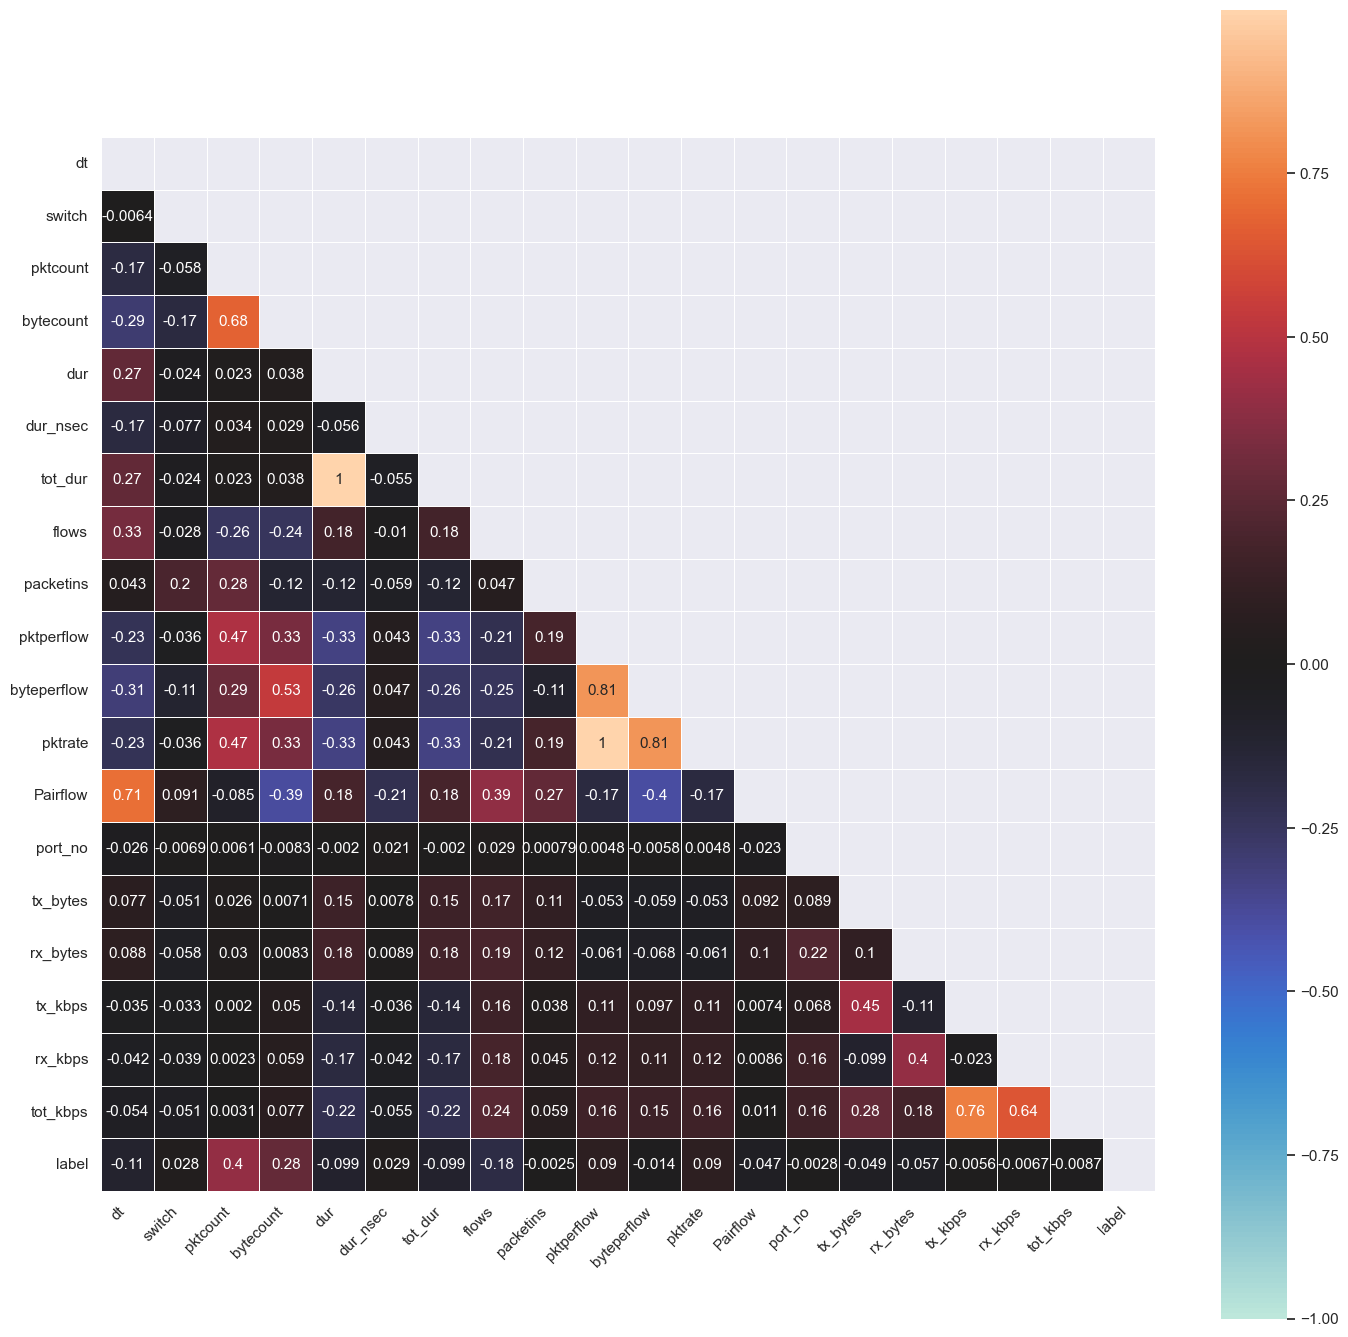

In [116]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(17, 17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_theme(style = "darkgrid")
ax = sns.heatmap(correlation_matrix, square = True, annot=True, center=0, vmin=-1, linewidths = .5, annot_kws = {"size": 11}, mask = mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.show()

Encoding Categorical features

In [117]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


In [118]:
df = pd.get_dummies(df, columns = categorical_features, drop_first = True)
print("After Encoding Dataframe has {} rows and {} columns. ".format(df.shape[0], df.shape[1]))

After Encoding Dataframe has 103839 rows and 57 columns. 


In [119]:
df.head(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,0,0,0,0,0,0,1,0,0,1
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,0,0,0,0,0,0,1,0,0,1
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,0,0,0,0,0,0,1,0,0,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 57 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   dt             103839 non-null  int64  
 1   switch         103839 non-null  int64  
 2   pktcount       103839 non-null  int64  
 3   bytecount      103839 non-null  int64  
 4   dur            103839 non-null  int64  
 5   dur_nsec       103839 non-null  int64  
 6   tot_dur        103839 non-null  float64
 7   flows          103839 non-null  int64  
 8   packetins      103839 non-null  int64  
 9   pktperflow     103839 non-null  int64  
 10  byteperflow    103839 non-null  int64  
 11  pktrate        103839 non-null  int64  
 12  Pairflow       103839 non-null  int64  
 13  port_no        103839 non-null  int64  
 14  tx_bytes       103839 non-null  int64  
 15  rx_bytes       103839 non-null  int64  
 16  tx_kbps        103839 non-null  int64  
 17  rx_kbps        103839 non-nul

# Training and Testing

Splitting Dependant(Label) and Independant Variables

In [121]:
x = df.drop(['label'], axis=1)
y = df['label']

In [122]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [123]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

Training [80%] and Testing [20%] Split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(83071, 56) (20768, 56)


# Machine Learning Algorithms

1. K Nearest Neighbor

In [125]:
model_accuracies = []

In [126]:
print(model_accuracies)

[]


In [127]:
import pickle

In [128]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [129]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_pred)
model_accuracies.append(knn_accuracy * 100)
print("KNN Accuracy : %.2f" % (knn_accuracy * 100))

KNN Accuracy : 96.80


In [130]:
with open('models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

2. Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_accuracy = metrics.accuracy_score(y_test, y_pred)
model_accuracies.append(lr_accuracy * 100)
print("Logistic Regression Accuracy : %.2f" % (lr_accuracy * 100))

Logistic Regression Accuracy : 84.21


In [133]:
with open('models/lr_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

3. Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
model_accuracies.append(dt_accuracy * 100)
print("Decision Tree Accuracy : %.2f" % (dt_accuracy * 100))

Decision Tree Accuracy : 96.44


In [136]:
with open('models/dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

4. Support Vector Machine

In [137]:
from sklearn.svm import SVC

In [138]:
svm = SVC() 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
model_accuracies.append(svm_accuracy * 100)
print("SVM Accuracy : %.2f" % (svm_accuracy * 100))

SVM Accuracy : 97.60


In [139]:
with open('models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm, file)

# Defining Deep Neural Network

In [140]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [141]:
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the Neural Network

In [142]:
dnn_model = model.fit(
    X_train,
    y_train,
    batch_size = 32,
    epochs = 50, 
    verbose=2,
    callbacks = None,
    validation_data = (X_test, y_test),
    shuffle = True,
    class_weight = None,
    sample_weight = None,
    initial_epoch = 0
)

Epoch 1/50
2596/2596 - 7s - loss: 0.1467 - accuracy: 0.9378 - val_loss: 0.0846 - val_accuracy: 0.9656 - 7s/epoch - 3ms/step
Epoch 2/50
2596/2596 - 10s - loss: 0.0843 - accuracy: 0.9658 - val_loss: 0.0660 - val_accuracy: 0.9727 - 10s/epoch - 4ms/step
Epoch 3/50
2596/2596 - 5s - loss: 0.0693 - accuracy: 0.9723 - val_loss: 0.0630 - val_accuracy: 0.9718 - 5s/epoch - 2ms/step
Epoch 4/50
2596/2596 - 5s - loss: 0.0594 - accuracy: 0.9759 - val_loss: 0.0586 - val_accuracy: 0.9746 - 5s/epoch - 2ms/step
Epoch 5/50
2596/2596 - 6s - loss: 0.0527 - accuracy: 0.9779 - val_loss: 0.0973 - val_accuracy: 0.9633 - 6s/epoch - 2ms/step
Epoch 6/50
2596/2596 - 5s - loss: 0.0508 - accuracy: 0.9796 - val_loss: 0.0453 - val_accuracy: 0.9799 - 5s/epoch - 2ms/step
Epoch 7/50
2596/2596 - 5s - loss: 0.0483 - accuracy: 0.9802 - val_loss: 0.0356 - val_accuracy: 0.9853 - 5s/epoch - 2ms/step
Epoch 8/50
2596/2596 - 5s - loss: 0.0441 - accuracy: 0.9819 - val_loss: 0.0362 - val_accuracy: 0.9837 - 5s/epoch - 2ms/step
Epoch 

In [147]:
dnn_loss, dnn_accuracy = model.evaluate(X_test, y_test)
print('Deep neural Network Accuracy: %.2f' % (dnn_accuracy*100))

649/649 [==============================] - 1s 2ms/step - loss: 0.0173 - accuracy: 0.9923
Accuracy of Deep neural Network : 99.23


Saving the Model

In [148]:
model.save("models/DNN_model.h5")

c:\Users\Pratham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [153]:
model_accuracies.append(dnn_accuracy * 100)

Accuracy vs Number of Epochs

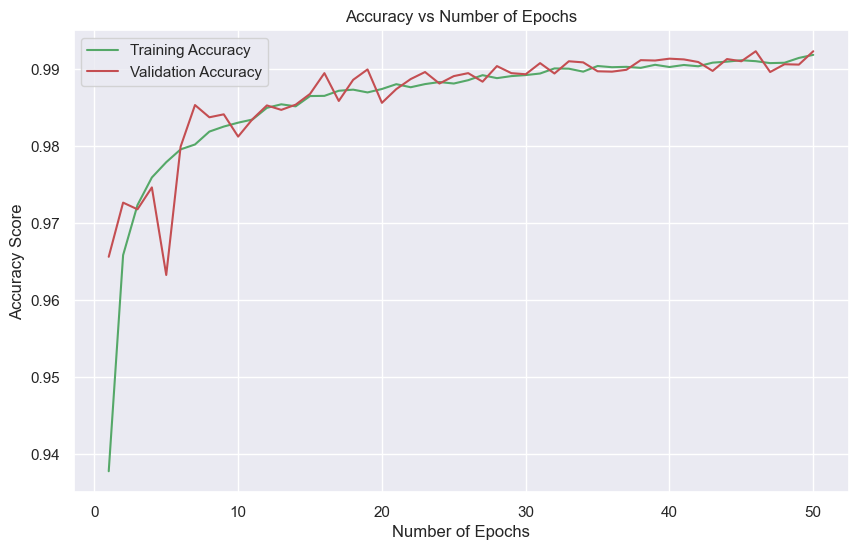

In [159]:
plt.figure(figsize = (10, 6))

accuracy = dnn_model.history['accuracy']
val_accuracy = dnn_model.history['val_accuracy']
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g-', label = "Training Accuracy")
plt.plot(epochs, val_accuracy, 'r-', label = "Validation Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()

Loss vs Number of Epochs

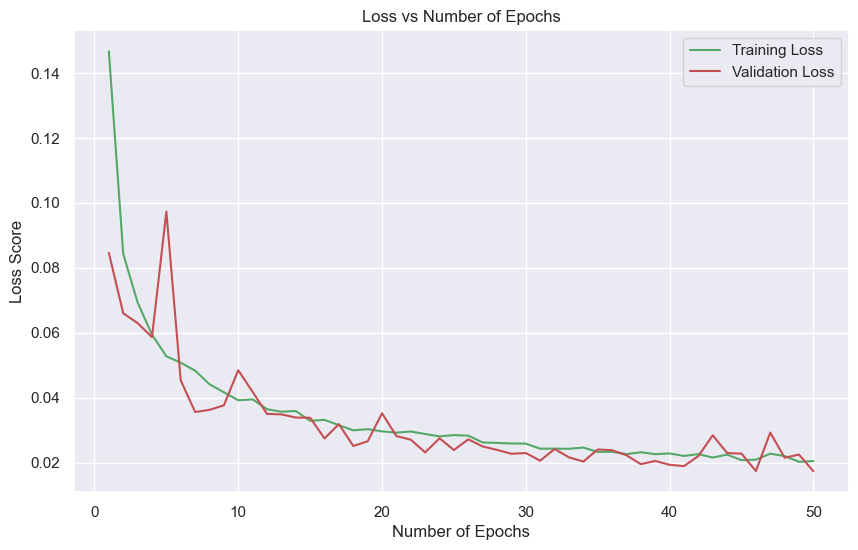

In [160]:
plt.figure(figsize = (10, 6))

loss = dnn_model.history['loss']
val_loss = dnn_model.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'g-', label = "Training Loss")
plt.plot(epochs, val_loss, 'r-', label = "Validation Loss")
plt.title("Loss vs Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Score")
plt.legend()
plt.grid(True)
plt.show()